<a href="https://colab.research.google.com/github/SAISKAND/Python-projects/blob/main/ML_Algorithms_scratch/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Data for ML lab/student_scores.csv')
df
X=df['Hours']
Y=df['Scores']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Simple Linear Regression


9.896964110671043 1.6314708810783134


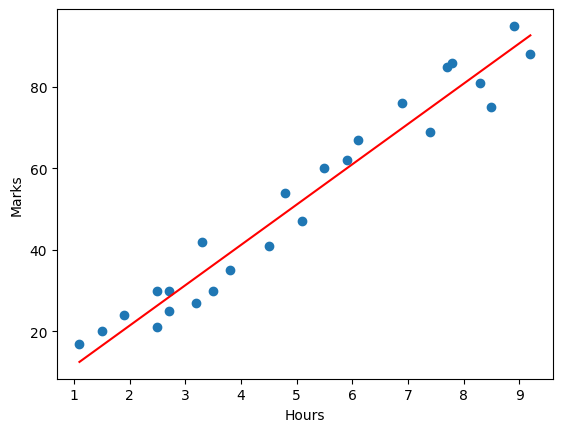

In [ ]:
m = 0
c = 0
L = 0.0001
iter = 1000
n = float(len(X))

# Performing Gradient Descent
for i in range(iter):
  Y_bar = m*X + c
  D_m = (-2/n) * sum(X * (Y - Y_bar))
  D_c = (-2/n) * sum(Y - Y_bar)
  m = m - L * D_m
  c = c - L * D_c
print (m, c)

Y_bar = m*X + c
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_bar), max(Y_bar)], color='red')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Data for ML lab/CO2 Emissions_Canada.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


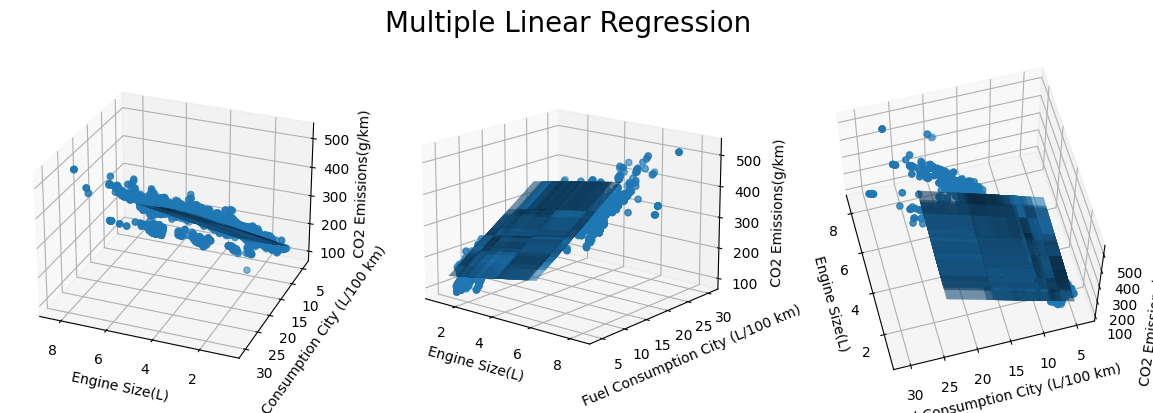

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the independent variables
x = data['Engine Size(L)']
y = data['Fuel Consumption City (L/100 km)']
z = data['CO2 Emissions(g/km)']


# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes=[ax1,ax2,ax3]
for ax in axes:
  ax.scatter(x, y, z)
  ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.2)
  ax.set_xlabel('Engine Size(L)')
  ax.set_ylabel('Fuel Consumption City (L/100 km)')
  ax.set_zlabel('CO2 Emissions(g/km)')

# Show the plot
ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Multiple Linear Regression', fontsize=20)

fig.tight_layout()
